# Resources
- Dataset Link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
- Github Link: https://github.com/nessasunjaya/KNN-to-Predict-Heart-Failure

# Data Preprocessing

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/nessasunjaya/KNN-to-Predict-Heart-Failure/main/heart.csv', on_bad_lines='skip')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
dataset['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [5]:
# handling categorical data

columns = dataset.columns

for column in columns:
  if dataset[column].dtype == 'object':
    dataset[column] = dataset[column].astype('category')
    dataset[column] = dataset[column].cat.codes

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int8   
 2   ChestPainType   918 non-null    int8   
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int8   
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int8   
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int8   
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), int8(5)
memory usage: 54.8 KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [6]:
# check correlation between HeartDisease and other columns 

corr_matx=dataset.corr()
corr_matx['HeartDisease']

Age               0.282039
Sex               0.305445
ChestPainType    -0.386828
RestingBP         0.107589
Cholesterol      -0.232741
FastingBS         0.267291
RestingECG        0.057384
MaxHR            -0.400421
ExerciseAngina    0.494282
Oldpeak           0.403951
ST_Slope         -0.558771
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

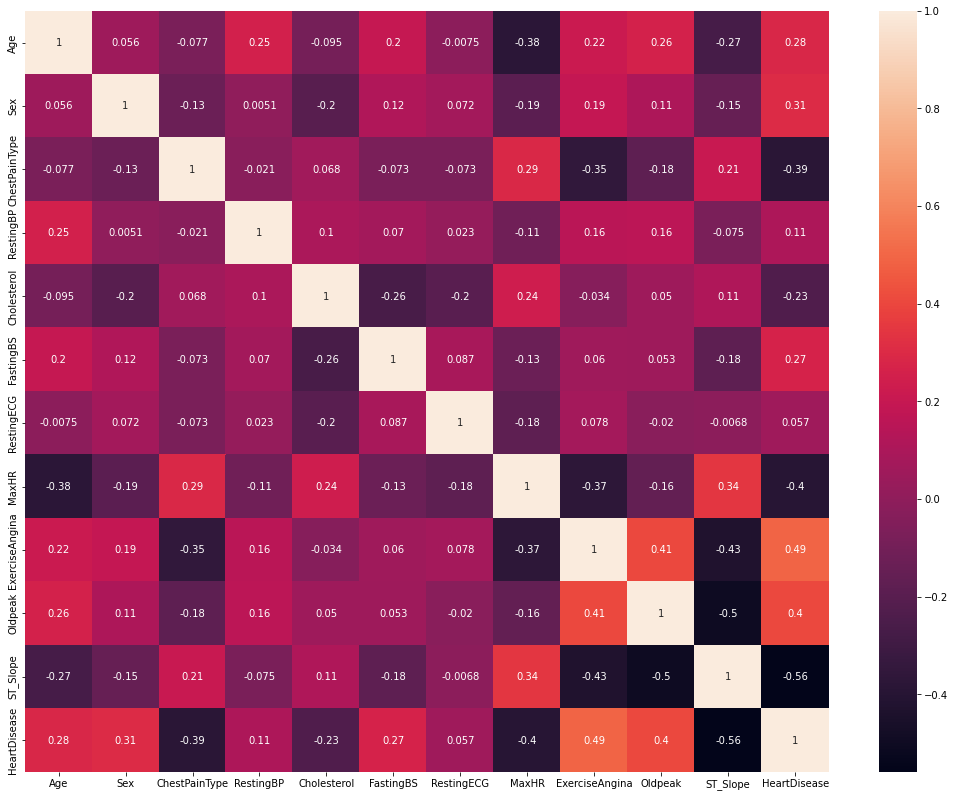

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt

corr_matrix = dataset.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.rcParams['figure.figsize'] = [18,14]
plt.show()

In [8]:
# decide the predicted attribute (X) and the contributing attributes (Y)

Y = dataset['HeartDisease']
X = dataset.drop(['HeartDisease', 'RestingECG'], axis=1)

X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,172,0,0.0,2
1,49,0,2,160,180,0,156,0,1.0,1
2,37,1,1,130,283,0,98,0,0.0,2
3,48,0,0,138,214,0,108,1,1.5,1
4,54,1,2,150,195,0,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,132,0,1.2,1
914,68,1,0,144,193,1,141,0,3.4,1
915,57,1,0,130,131,0,115,1,1.2,1
916,57,0,1,130,236,0,174,0,0.0,1


In [9]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [10]:
# Standardizing the value to achieve better accuracy of the model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']] = scaler.fit_transform(X[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,1,1,0.410909,0.825070,0,1.382928,0,-0.832432,2
1,-0.478484,0,2,1.491752,-0.171961,0,0.754157,0,0.105664,1
2,-1.751359,1,1,-0.129513,0.770188,0,-1.525138,0,-0.832432,2
3,-0.584556,0,0,0.302825,0.139040,0,-1.132156,1,0.574711,1
4,0.051881,1,2,0.951331,-0.034755,0,-0.581981,0,-0.832432,2


# Splitting between Training and Testing Data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3, random_state=42)

# Building and Training the Model with KNN

## Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X_train,y_train)
KNN_predictions = KNN_model.predict(X_test)

print(confusion_matrix(y_test,KNN_predictions))
print('\n')
print(classification_report(y_test,KNN_predictions))

[[ 95  17]
 [ 38 126]]


              precision    recall  f1-score   support

           0       0.71      0.85      0.78       112
           1       0.88      0.77      0.82       164

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.80       276



## Finding the best K Value

In [ ]:
error_rate = []

for i in range(1,40):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train,y_train)
    pred_i = KNN_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

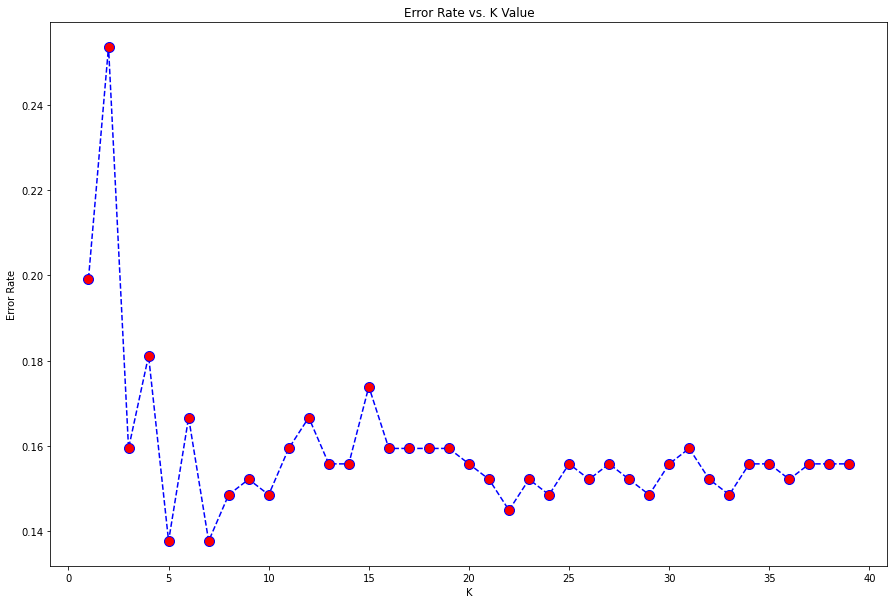

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Building Model based on the Best K Value

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

KNN_model.fit(X_train,y_train)
KNN_predictions = KNN_model.predict(X_test)

print(confusion_matrix(y_test,KNN_predictions))
print('\n')
print(classification_report(y_test,KNN_predictions))

[[ 98  14]
 [ 24 140]]


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       112
           1       0.91      0.85      0.88       164

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276

